In [1]:
import requests # used to access the online database

res = requests.get('http://www.laalmanac.com/weather/we04a.php')
html = res.content


In [2]:
from bs4 import BeautifulSoup # used to pull data from an HTML and parse it

soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table')

In [3]:
import pandas as pd # used to create and manipulate a dataframe

df = pd.read_html(str(table))
dfs = pd.DataFrame(data = df[0])
dfs

,Year,Temp,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual


In [4]:
annual = pd.DataFrame(data = dfs[['Year','Temp', 'Annual']])
annual.columns = range(annual.shape[1])   # Delete headers
annual

,0,1,2
0,2021,High,---
1,2021,Avg.,---
2,2021,Low,---
3,2020,High,111
4,2020,Avg.,67.8
...,...,...,...
430,1878,Avg.,62.0
431,1878,Low,30
432,1877,High,---
433,1877,Avg.,---


In [5]:
annual.columns = annual.columns.astype(str)
annual.rename(columns = {'0': 'Year', '1': 'Temp Type', '2': 'Degrees'}, inplace= True)

# get rid of the years 1877, 1914 and 2021 because they are missing data
annual = annual[(annual['Year'] != 1877) & (annual['Year'] != 1914) & (annual['Year'] != 2021)]

annual

,Year,Temp Type,Degrees
3,2020,High,111
4,2020,Avg.,67.8
5,2020,Low,42
6,2019,High,97
7,2019,Avg.,66.1
...,...,...,...
427,1879,Avg.,61.9
428,1879,Low,30
429,1878,High,103
430,1878,Avg.,62.0


     Year Temp Type  Degrees
427  1879      Avg.     61.9
   Year Temp Type  Degrees
7  2019      Avg.     66.1
Slope of the regression line = 0.030


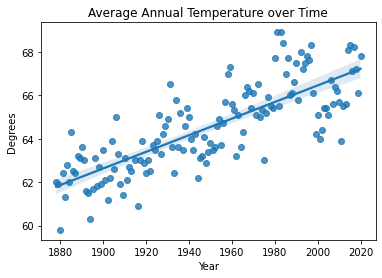

In [6]:
# fit linear regression line to data, must use 2D arrays (reshape)
from sklearn import linear_model as lm
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

avg = annual.copy()[annual['Temp Type'] == 'Avg.']
avg['Degrees'] = avg['Degrees'].astype(float)

#print(avg['Year'].where(avg['Year'] == 1879))
print(avg.loc[[427]])

#print(avg['Year'].where(avg['Year'] == 2019))
print(avg.loc[[7]])

slope = float((66.1 - 61.9) / (2019 - 1879))
print("Slope of the regression line = " + "{:.3f}".format(slope))


plot = sns.regplot(x="Year", y="Degrees", data=avg).set(title = 'Average Annual Temperature over Time')

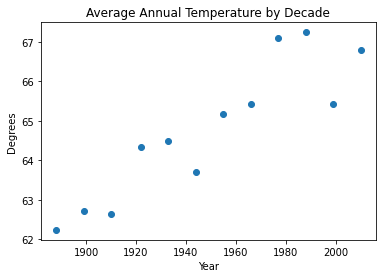

In [7]:
decade_avg = [] # holds average for each 10 year span
decade = [] # every ten year split
count = 0 # counter that resets every ten years

decade_temps = [] # temporary array that holds 10 years of data, resets each 10 years
for i, row in avg.iterrows():
  
  # When we reach the end of a ten year span, calcualate sum of the ten year span, add the data to appropriate lists and reset variable accordingly
  if count == 10:
    decade_avg.append(sum(decade_temps) / len(decade_temps))
    decade.append(avg.at[i, 'Year'])
    count = 0
    decade_temps = []

  # When in the middle of a decade, we add the average for that year into the appropriate list and increment the counter
  else:
    decade_temps.append(avg.at[i, 'Degrees'])
    count = count + 1

# Data comes out most recent to least recent, so we reverse it so that it plots correctly
decade.reverse()
decade_avg.reverse()

# Scatterplot of the data we just gathered
plt.scatter(x=decade, y=decade_avg)
plt.xlabel("Year")
plt.ylabel("Degrees")
plt.title("Average Annual Temperature by Decade")
plt.show()

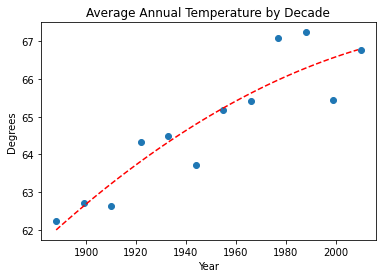

In [8]:
from scipy.optimize import curve_fit
from numpy import arange

# this function calculates the polynomial squares needed for polynomial regression
# this contrasts to the linear slope we had used earlier
def poly(x, a, b, c):
	return a * x + b * x**2 + c

popt, _ = curve_fit(poly, decade, decade_avg)
# summarize the parameter values
a, b, c = popt

plt.scatter(decade, decade_avg)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(decade), max(decade), 1)
# calculate the output for the range
y_line = poly(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Year")
plt.ylabel("Degrees")
plt.title("Average Annual Temperature by Decade")
plt.show()

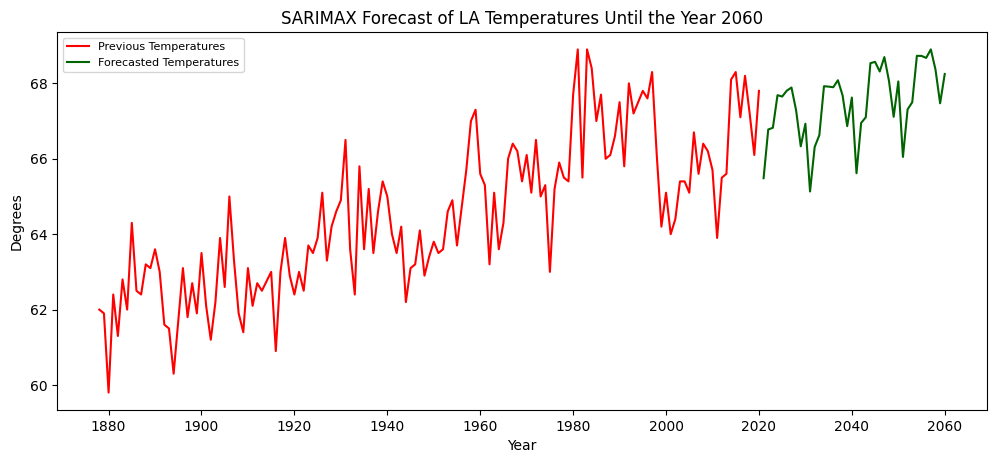

In [12]:
%%capture --no-display
# https://brittarude.github.io/blog/2020/11/22/britta-rude-forecasting-with-python
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

ml_data = avg[['Year', 'Degrees']]
ml_data['Year'] = ml_data['Year'].to_numpy()[::-1]
ml_data['Degrees'] = ml_data['Degrees'].to_numpy()[::-1]

ml_data["Year_str"] = ml_data["Year"].astype(str)
ml_data['Year_date'] = ml_data['Year_str'] + "-01-01"
ml_data["Year_date"] = pd.to_datetime(ml_data["Year_date"])
ml_data = ml_data.set_index("Year_date")

train = ml_data.query("Year<1978")
test = ml_data.query("Year>1978")
y_train = train.Degrees
y_test = test.Degrees


model = ARIMA(y_train, order=(1, 1, 1))    
fitted = model.fit()

# Forecast
#fc = fitted.forecast(42, alpha=0.05)  # 95% conf

# Make as pandas series
#fc_series = pd.Series(fc, index=test.index)

sxmodel = pm.auto_arima(ml_data[['Degrees']], 
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=10,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

n_periods = 40
fitted, confint = sxmodel.predict(n_periods=n_periods,
                                  return_conf_int=True)

index_of_fc = pd.Series(pd.date_range("2020-01-01", periods=n_periods, freq="Y"))

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ml_data.Degrees, color='red', label='Previous Temperatures')
plt.plot(fitted_series, color='darkgreen', label='Forecasted Temperatures')
plt.legend(loc='upper left', fontsize=8)

plt.title("SARIMAX Forecast of LA Temperatures Until the Year 2060")
plt.ylabel("Degrees")
plt.xlabel("Year")
plt.show()

In [10]:
#print(avg['Year'].where(avg['Year'] == 1879))
#print(avg.loc[[427]])

print("2030 annual average: " + "{:.3f}".format(fitted_series[9]))
print("2040 annual average: " + "{:.3f}".format(fitted_series[19]))
print("2050 annual average: " + "{:.3f}".format(fitted_series[29]))
print("2060 annual average: " + "{:.3f}".format(fitted_series[39]))

2030 annual average: 66.929
2040 annual average: 67.622
2050 annual average: 68.050
2060 annual average: 68.248


In [11]:
Now that we have some future predictions, we can make some conclusions about our data
In 1878, where our data begins, the average annual temperature was 62.0 degrees. In 2020, where our data ends it was 67.8 degrees.
We recognize that the average annual temperature is rising, and we see that our conclusion is backed up by the predictive analysis.
We predict that the average annual temperature will continue to slowly rise, up over 68 degrees by 2060.

SyntaxError: invalid syntax (Temp/ipykernel_24028/4142279125.py, line 1)